In [1]:
from numpy import zeros
from numpy import asarray

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [17]:
import pandas as pd

In [2]:
import os
PATH = os.getcwd()

In [4]:
os.chdir(PATH)

In [5]:
import numpy
numpy.random.seed(123)

In [3]:
from pandas import DataFrame, concat, read_csv

In [7]:
#load dataset
data = read_csv('traindata-1548399384664.csv', usecols=[1,2,3,4,5,6,7,8])

In [26]:
test = read_csv('testdata-1548399401363.csv', usecols=[1,2,3,4,5,6,7,8])

# EDA

In [8]:
data.shape

(3107, 8)

In [27]:
test.shape

(1036, 8)

In [9]:
data.head()

,Name,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,rating
0,enalapril,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",low
1,ortho-tri-cyclen,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",low
2,ponstel,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,high
3,prilosec,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,low
4,lyrica,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,low


In [11]:
data.isnull().sum()

Name                 0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
rating               0
dtype: int64

In [29]:
test.isnull().sum()

Name                 0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
Rating               0
dtype: int64

In [12]:
data = data.dropna(axis=0)

In [215]:
data.shape

(3096, 8)

In [18]:
len(pd.unique(data['Name']))

501

In [30]:
len(pd.unique(test['Name']))

314

In [15]:
data['Name'].value_counts()

lexapro                          63
prozac                           46
retin-a                          45
zoloft                           45
paxil                            38
propecia                         38
synthroid                        38
cymbalta                         33
effexor                          33
wellbutrin                       32
chantix                          32
doxycycline                      31
neurontin                        31
ambien                           30
lamictal                         29
effexor-xr                       29
lipitor                          29
accutane                         28
renova                           27
imitrex                          27
nexium                           27
adipex-p                         25
differin                         25
topamax                          25
vyvanse                          24
flonase                          24
wellbutrin-xl                    23
zyrtec                      

In [20]:
data['effectiveness'].value_counts()

Highly Effective          1327
Considerably Effective     925
Moderately Effective       413
Ineffective                245
Marginally Effective       186
Name: effectiveness, dtype: int64

In [31]:
test['effectiveness'].value_counts()

Highly Effective          411
Considerably Effective    310
Moderately Effective      157
Ineffective                82
Marginally Effective       76
Name: effectiveness, dtype: int64

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

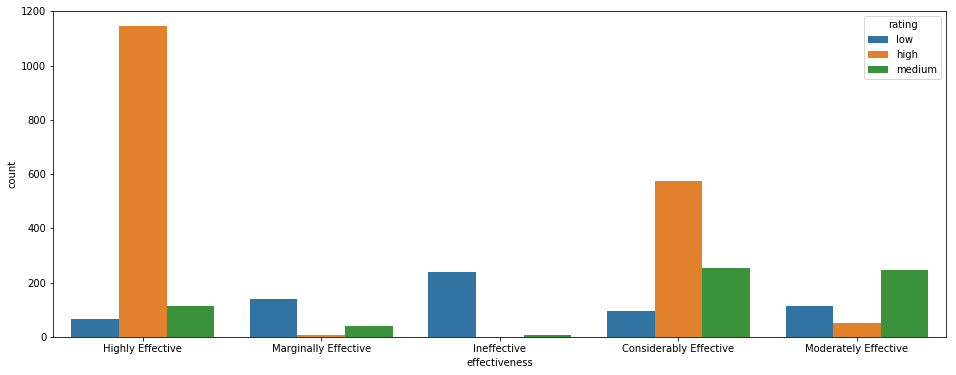

In [181]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="effectiveness",hue="rating", data=data)

In [21]:
data['sideEffects'].value_counts()

Mild Side Effects                1017
No Side Effects                   925
Moderate Side Effects             612
Severe Side Effects               367
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [32]:
test['sideEffects'].value_counts()

Mild Side Effects                330
No Side Effects                  268
Moderate Side Effects            236
Severe Side Effects              122
Extremely Severe Side Effects     80
Name: sideEffects, dtype: int64

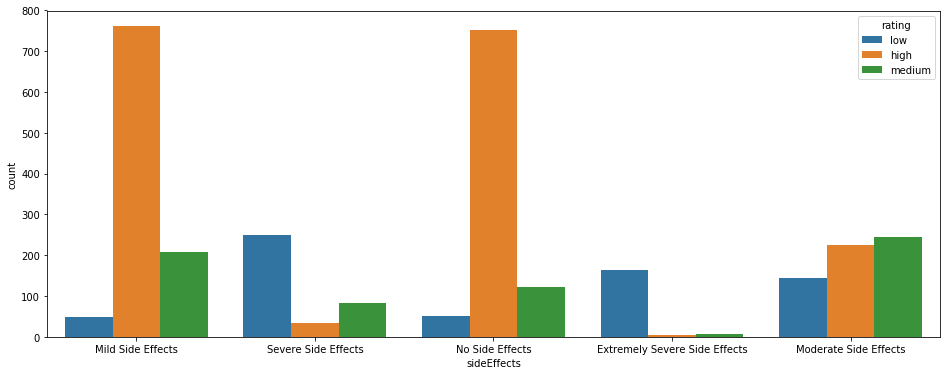

In [182]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="sideEffects",hue="rating", data=data)

In [23]:
data['rating'].value_counts()

high      1775
medium     665
low        656
Name: rating, dtype: int64

In [34]:
test['Rating'].value_counts()

high      549
medium    246
low       241
Name: Rating, dtype: int64

In [36]:
docs_train = data['benefitsReview']
docs_test = test['benefitsReview']
labels_train = data['rating']
labels_test = test['Rating']

In [37]:
labels_dum_train = pd.get_dummies(labels_train)
labels_dum_test = pd.get_dummies(labels_test)

labels_dum_train.head()

,high,low,medium
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [38]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs_train)

print (t.word_index)

vocab_size = len(t.word_index) + 1
print (vocab_size)

{'the': 1, 'i': 2, 'and': 3, 'to': 4, 'of': 5, 'my': 6, 'a': 7, 'it': 8, 'was': 9, 'in': 10, 'for': 11, 'that': 12, 'with': 13, 'not': 14, 'have': 15, 'me': 16, 'had': 17, 'this': 18, 'as': 19, 'is': 20, 'on': 21, 'but': 22, 'pain': 23, 'more': 24, 'after': 25, 'at': 26, 'no': 27, 'taking': 28, 'did': 29, 'from': 30, 'drug': 31, 'so': 32, 'or': 33, 'very': 34, 'were': 35, 'also': 36, 'day': 37, 'up': 38, 'skin': 39, 'sleep': 40, 'when': 41, 'treatment': 42, 'able': 43, 'medication': 44, 'time': 45, 'be': 46, 'better': 47, 'would': 48, 'effects': 49, 'all': 50, 'has': 51, 'which': 52, 'about': 53, 'take': 54, 'am': 55, 'much': 56, 'side': 57, 'depression': 58, 'symptoms': 59, 'feel': 60, 'get': 61, 'helped': 62, 'less': 63, 'only': 64, 'an': 65, 'been': 66, 'years': 67, 'reduced': 68, 'benefits': 69, 'acne': 70, 'if': 71, 'days': 72, 'any': 73, 'anxiety': 74, 'first': 75, 'felt': 76, 'without': 77, 'before': 78, '\r\r': 79, 'life': 80, 'are': 81, 'there': 82, 'within': 83, 'like': 84, '

In [39]:
encoded_docs_train = t.texts_to_sequences(docs_train)
print(docs_train)
print(encoded_docs_train)

0       slowed the progression of left ventricular dys...
1       Although this type of birth control has more c...
2       I was used to having cramps so badly that they...
3       The acid reflux went away for a few months aft...
4       I think that the Lyrica was starting to help w...
5       after taking propecia for over a year, startin...
6       My mood has noticably improved, I have more en...
7       Although this drug was originally prescribed f...
8       This simply just works fast and without any of...
9       none - did nothing to help allergies. i just h...
10      I experienced complete clearing of the Vaginos...
11      Smoother more gradual onset and effect than Ad...
12      I found that this drug helps significantly wit...
13      For the first time in my life I had enough las...
14      Aldara did seem to crust up my previous skin c...
15      reduction in anxiety, no panic attacks.  drug ...
16      I'm taking Gabapentin to treat nerve disorder....
17            

In [45]:
max_length_train = max([len(s.split()) for s in data.benefitsReview])
print(max_length_train)

padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length_train, padding='post')

394


In [48]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [49]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

dict_items([('the', 1), ('i', 2), ('and', 3), ('to', 4), ('of', 5), ('my', 6), ('a', 7), ('it', 8), ('was', 9), ('in', 10), ('for', 11), ('that', 12), ('with', 13), ('not', 14), ('have', 15), ('me', 16), ('had', 17), ('this', 18), ('as', 19), ('is', 20), ('on', 21), ('but', 22), ('pain', 23), ('more', 24), ('after', 25), ('at', 26), ('no', 27), ('taking', 28), ('did', 29), ('from', 30), ('drug', 31), ('so', 32), ('or', 33), ('very', 34), ('were', 35), ('also', 36), ('day', 37), ('up', 38), ('skin', 39), ('sleep', 40), ('when', 41), ('treatment', 42), ('able', 43), ('medication', 44), ('time', 45), ('be', 46), ('better', 47), ('would', 48), ('effects', 49), ('all', 50), ('has', 51), ('which', 52), ('about', 53), ('take', 54), ('am', 55), ('much', 56), ('side', 57), ('depression', 58), ('symptoms', 59), ('feel', 60), ('get', 61), ('helped', 62), ('less', 63), ('only', 64), ('an', 65), ('been', 66), ('years', 67), ('reduced', 68), ('benefits', 69), ('acne', 70), ('if', 71), ('days', 72), 

In [50]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [51]:
print (embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.41800001  0.24968    -0.41242    ... -0.18411    -0.11514
  -0.78580999]
 [ 0.11891     0.15255    -0.082073   ... -0.57511997 -0.26671001
   0.92120999]
 ...
 [ 0.76674998 -0.2015      1.07599998 ...  0.20727    -0.48925
  -0.021907  ]
 [ 0.10302    -1.43229997  0.31040001 ...  0.61821997 -0.18032999
  -0.31816   ]
 [-1.31040001  0.56039     0.69914001 ...  1.06050003  0.12812001
   0.32953   ]]


In [146]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length_train, trainable=True))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [147]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [148]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 478, 50)           392000    
_________________________________________________________________
dropout_22 (Dropout)         (None, 478, 50)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 23900)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 71703     
Total params: 463,703
Trainable params: 463,703
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
# fit the model
%time model.fit(padded_docs_train, labels_dum_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Train on 2476 samples, validate on 620 samples
Epoch 1/100
2476/2476 [==============================] - 4s 1ms/step - loss: 0.9881 - acc: 0.5658 - val_loss: 0.9532 - val_acc: 0.5968
Epoch 2/100
2476/2476 [==============================] - 2s 752us/step - loss: 0.7935 - acc: 0.6462 - val_loss: 0.9390 - val_acc: 0.6113
Epoch 3/100
2476/2476 [==============================] - 2s 760us/step - loss: 0.6974 - acc: 0.6987 - val_loss: 0.9675 - val_acc: 0.6145
Epoch 4/100
2476/2476 [==============================] - 2s 758us/step - loss: 0.6331 - acc: 0.7347 - val_loss: 0.9503 - val_acc: 0.5806
Epoch 5/100
2476/2476 [==============================] - 2s 750us/step - loss: 0.5687 - acc: 0.7771 - val_loss: 0.9655 - val_acc: 0.6113
Epoch 6/100
2476/2476 [==============================] - 2s 757us/step - loss: 0.5250 - acc: 0.7977 - val_loss: 0.9639 - val_acc: 0.5726
Epoch 7/100
2476/2476 [==============================] - 2s 754us/step - loss: 0.4711 - acc: 0.8304 - val_loss: 1.0045 - val_acc: 0.5

In [117]:
Y_train = model.predict(padded_docs_train)

In [118]:
y_train_pred_1 = numpy.argmax(Y_train, axis=1)
print(y_test_pred_1[0:20])

[0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 1 0 1 1 1]


In [119]:
loss, accuracy = model.evaluate(padded_docs_train, labels_dum_train, verbose=1)

print('Train Accuracy: %f' % (accuracy*100))

3096/3096 [==============================] - 0s 70us/step
Train Accuracy: 91.149871


In [120]:
Y_train = model.predict(padded_docs_train)

# Predict on Test

In [63]:
encoded_docs_test = t.texts_to_sequences(docs_test)
print(docs_test)
print(encoded_docs_test)

0       The antibiotic may have destroyed bacteria cau...
1       Lamictal stabilized my serious mood swings. On...
2       Initial benefits were comparable to the brand ...
3       It controlls my mood swings. It helps me think...
4       Within one week of treatment superficial acne ...
5       By the end of the 10-day treatment I felt bett...
6       reduction in seizures reduction in seizures re...
7       Ive been taking Tramadol for 2 weeks now. Ive ...
8       I immediately stopped having panic attacks.  I...
9       the presumed benefits were to help with a seve...
10      some pain relief recieved minimized pain when ...
11      Significantly diminished the symptoms and size...
12      Treatment benefits were noticeable but not sub...
13      Very quick migraine relief with no nausea or d...
14      The xanax would act as a downer. It would calm...
15          The benefits were to eventually stop smoking.
16      to reduce acid production and stop acid reflux...
17      Stoppe

In [65]:
max_length_test = max([len(s.split()) for s in test.benefitsReview])
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length_train, padding='post')
max_length_test

353

In [121]:
Y_test = model.predict(padded_docs_test)

In [122]:
y_test_pred_1 = numpy.argmax(Y_test, axis=1)
print(y_test_pred_1[0:20])

[2 0 0 0 0 0 2 0 0 0 1 0 2 0 2 1 0 1 1 1]


In [123]:
loss_1, accuracy_1 = model.evaluate(padded_docs_test, labels_dum_test, verbose=0)
print('Test Accuracy for Model 1: %f' % (accuracy_1*100))

Test Accuracy for Model 1: 56.081081


# Model 2

In [90]:
from keras.layers import LSTM, Dropout

In [125]:
# define model
model1 = Sequential()
model1.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length_train, trainable=True))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(3, activation='softmax'))

In [126]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [127]:
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 394, 50)           392000    
_________________________________________________________________
dropout_20 (Dropout)         (None, 394, 50)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 303       
Total params: 452,703
Trainable params: 452,703
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
# fit the model
%time model1.fit(padded_docs_train, labels_dum_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Train on 2476 samples, validate on 620 samples
Epoch 1/100
2476/2476 [==============================] - 20s 8ms/step - loss: 1.0199 - acc: 0.5743 - val_loss: 0.9836 - val_acc: 0.5694
Epoch 2/100
2476/2476 [==============================] - 17s 7ms/step - loss: 0.9789 - acc: 0.5743 - val_loss: 0.9820 - val_acc: 0.5694
Epoch 3/100
2476/2476 [==============================] - 18s 7ms/step - loss: 0.9783 - acc: 0.5743 - val_loss: 0.9819 - val_acc: 0.5694
Epoch 4/100
2476/2476 [==============================] - 18s 7ms/step - loss: 0.9800 - acc: 0.5743 - val_loss: 0.9819 - val_acc: 0.5694
Epoch 5/100
2476/2476 [==============================] - 18s 7ms/step - loss: 0.9790 - acc: 0.5743 - val_loss: 0.9815 - val_acc: 0.5694
Epoch 6/100
2476/2476 [==============================] - 18s 7ms/step - loss: 0.9815 - acc: 0.5743 - val_loss: 0.9868 - val_acc: 0.5694
Epoch 7/100
2476/2476 [==============================] - 18s 7ms/step - loss: 0.9797 - acc: 0.5743 - val_loss: 0.9818 - val_acc: 0.5694
E

In [129]:
Y_train1 = model1.predict(padded_docs_train)

In [132]:
y_train_pred_2 = numpy.argmax(Y_train1, axis=1)
print(y_train_pred_2[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [133]:
loss, accuracy = model1.evaluate(padded_docs_train, labels_dum_train, verbose=1)

print('Train Accuracy: %f' % (accuracy*100))

3096/3096 [==============================] - 9s 3ms/step
Train Accuracy: 57.332041


In [134]:
Y_test1 = model1.predict(padded_docs_test)

In [135]:
y_test_pred_2 = numpy.argmax(Y_test1, axis=1)
print(y_test_pred_2[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [136]:
loss_1, accuracy_1 = model1.evaluate(padded_docs_test, labels_dum_test, verbose=0)
print('Test Accuracy for Model 1: %f' % (accuracy_1*100))

Test Accuracy for Model 1: 52.992278


In [1]:
# choosing this model as it is not overfitting

In [190]:
review_out_train = pd.DataFrame(y_train_pred_2)
review_out_train.columns =['r1_out']
review_out_train.head()

,r1_out
0,0
1,0
2,0
3,0
4,0


In [191]:
review_out_test = pd.DataFrame(y_test_pred_2)
review_out_test.columns =['r1_out']
review_out_test.head()

,r1_out
0,0
1,0
2,0
3,0
4,0


# sideEffectsReview

In [153]:
docs_train1 = data['sideEffectsReview']
docs_test1 = test['sideEffectsReview']

In [154]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs_train1)

print (t.word_index)

vocab_size = len(t.word_index) + 1
print (vocab_size)

{'i': 1, 'the': 2, 'and': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'it': 8, 'was': 9, 'side': 10, 'in': 11, 'effects': 12, 'that': 13, 'not': 14, 'have': 15, 'had': 16, 'but': 17, 'for': 18, 'this': 19, 'is': 20, 'on': 21, 'with': 22, 'after': 23, 'no': 24, 'at': 25, 'taking': 26, 'as': 27, 'me': 28, 'very': 29, 'or': 30, 'none': 31, 'were': 32, 'when': 33, 'if': 34, 'also': 35, 'drug': 36, 'be': 37, 'so': 38, 'any': 39, 'day': 40, '\r\r': 41, 'skin': 42, 'medication': 43, 'some': 44, 'time': 45, 'first': 46, 'would': 47, 'pain': 48, 'all': 49, 'did': 50, 'take': 51, 'which': 52, 'dry': 53, 'from': 54, 'more': 55, 'about': 56, 'there': 57, 'effect': 58, 'severe': 59, 'like': 60, 'felt': 61, 'only': 62, 'up': 63, 'an': 64, 'weight': 65, 'am': 66, 'mild': 67, 'days': 68, 'experienced': 69, 'stomach': 70, 'other': 71, 'you': 72, 'feel': 73, 'nausea': 74, 'been': 75, 'loss': 76, 'are': 77, 'get': 78, 'sleep': 79, 'mouth': 80, 'feeling': 81, '2': 82, 'could': 83, 'dose': 84, 'out': 85, 'one': 

In [155]:
encoded_docs_train = t.texts_to_sequences(docs_train1)

In [156]:
max_length_train = max([len(s.split()) for s in data.sideEffectsReview])
print(max_length_train)

padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length_train, padding='post')

478


In [157]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.50d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [158]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [159]:
# define model
model1 = Sequential()
model1.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=max_length_train, trainable=True))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dropout(0.2))
model1.add(Dense(3, activation='softmax'))

In [160]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [161]:
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 478, 50)           353950    
_________________________________________________________________
dropout_25 (Dropout)         (None, 478, 50)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 303       
Total params: 414,653
Trainable params: 414,653
Non-trainable params: 0
_________________________________________________________________
None


In [162]:
# fit the model
%time model1.fit(padded_docs_train, labels_dum_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Train on 2476 samples, validate on 620 samples
Epoch 1/20
2476/2476 [==============================] - 38s 16ms/step - loss: 1.0147 - acc: 0.5747 - val_loss: 0.9822 - val_acc: 0.5694
Epoch 2/20
2476/2476 [==============================] - 33s 13ms/step - loss: 0.9800 - acc: 0.5747 - val_loss: 0.9822 - val_acc: 0.5694
Epoch 3/20
2476/2476 [==============================] - 32s 13ms/step - loss: 0.9785 - acc: 0.5747 - val_loss: 0.9830 - val_acc: 0.5694
Epoch 4/20
2476/2476 [==============================] - 25s 10ms/step - loss: 0.9782 - acc: 0.5747 - val_loss: 0.9827 - val_acc: 0.5694
Epoch 5/20
2476/2476 [==============================] - 25s 10ms/step - loss: 0.9768 - acc: 0.5747 - val_loss: 0.9823 - val_acc: 0.5694
Epoch 6/20
2476/2476 [==============================] - 26s 11ms/step - loss: 0.9790 - acc: 0.5747 - val_loss: 0.9821 - val_acc: 0.5694
Epoch 7/20
2476/2476 [==============================] - 26s 10ms/step - loss: 0.9799 - acc: 0.5747 - val_loss: 0.9888 - val_acc: 0.5694
E

In [163]:
Y_train2 = model1.predict(padded_docs_train)

In [164]:
y_train_pred_3 = numpy.argmax(Y_train2, axis=1)
print(y_train_pred_2[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [165]:
loss, accuracy = model1.evaluate(padded_docs_train, labels_dum_train, verbose=1)

print('Train Accuracy: %f' % (accuracy*100))

3096/3096 [==============================] - 11s 4ms/step
Train Accuracy: 57.364341


In [167]:
encoded_docs_test = t.texts_to_sequences(docs_test1)
print(docs_test1)
print(encoded_docs_test)

0                           Some back pain, some nauseau.
1       Drowsiness, a bit of mental numbness. If you t...
2       Depakene has a very thin coating, which caused...
3                 I didnt really notice any side effects.
4       Side effects included moderate to severe dry s...
5       I felt no significant side effects - perhaps s...
6       tired/sleepy very tired sleep and tired very t...
7       I have had no side effects so far. I hope it s...
8       I experienced no side effects.  I was not tire...
9       here we go.the initial effect would be dry mou...
10      signigicant swelling of hands and feet so sign...
11            Slight dizziness and tiredness, very minor.
12       nervousness, insomnia (if taken late in the day)
13                                      Very mild "buzz."
14      As I explained above. Addiction and drowsiness...
15      At first I experienced a slight headache and u...
16                              there are no side effects
17      Weight

In [168]:
max_length_test = max([len(s.split()) for s in test.sideEffectsReview])
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length_train, padding='post')
max_length_test

398

In [169]:
Y_test = model1.predict(padded_docs_test)

In [170]:
y_test_pred_3 = numpy.argmax(Y_test, axis=1)
print(y_test_pred_1[0:20])

[2 0 0 0 0 0 2 0 0 0 1 0 2 0 2 1 0 1 1 1]


In [171]:
loss_1, accuracy_1 = model.evaluate(padded_docs_test, labels_dum_test, verbose=0)
print('Test Accuracy for Model 1: %f' % (accuracy_1*100))

Test Accuracy for Model 1: 40.926641


In [192]:
review1_out_train = pd.DataFrame(y_train_pred_3)
review1_out_train.columns =['r2_out']
review1_out_train.head()

,r2_out
0,0
1,0
2,0
3,0
4,0


In [193]:
review1_out_test = pd.DataFrame(y_test_pred_3)
review1_out_test.columns =['r2_out']
review1_out_test.head()

,r2_out
0,0
1,0
2,0
3,0
4,0


# New Dataset

In [301]:
data_new = data[['effectiveness', 'sideEffects']]
data_new = data_new.reset_index(drop=True)
data_new = pd.concat([data_new, review_out_train], axis = 1)
data_new = pd.concat([data_new, review1_out_train], axis = 1)
data_new.head()

,effectiveness,sideEffects,r1_out,r2_out
0,Highly Effective,Mild Side Effects,0,0
1,Highly Effective,Severe Side Effects,0,0
2,Highly Effective,No Side Effects,0,0
3,Marginally Effective,Mild Side Effects,0,0
4,Marginally Effective,Severe Side Effects,0,0


In [302]:
data_new=pd.get_dummies(data_new,drop_first=True)

In [303]:
data_new.head()

,r1_out,r2_out,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,0,0,1,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1


In [304]:
data_new.shape

(3096, 10)

In [305]:
test_new = test[['effectiveness', 'sideEffects']]
test_new = test_new.reset_index(drop=True)
test_new = pd.concat([test_new, review_out_test], axis = 1)
test_new = pd.concat([test_new, review1_out_test], axis = 1)
test_new=pd.get_dummies(test_new,drop_first=True)
test_new.head()

,r1_out,r2_out,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0


In [306]:
test_new.shape

(1036, 10)

# Model on New Dataset

In [307]:
mlp_model1 = Sequential()

mlp_model1.add(Dense(12, input_dim=data_new.shape[1], activation='relu', kernel_initializer='normal'))
mlp_model1.add(Dense(8, activation='relu', kernel_initializer='normal'))
mlp_model1.add(Dense(3, activation='softmax', kernel_initializer='normal'))

In [308]:
mlp_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [309]:
print(mlp_model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_39 (Dense)             (None, 3)                 27        
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________
None


In [310]:
mlp_model1.fit(data_new, labels_dum_train, epochs=100, batch_size=64, validation_split=0.2)

Train on 2476 samples, validate on 620 samples
Epoch 1/100
2476/2476 [==============================] - 5s 2ms/step - loss: 1.0887 - acc: 0.5626 - val_loss: 1.0769 - val_acc: 0.5694
Epoch 2/100
2476/2476 [==============================] - 0s 55us/step - loss: 1.0582 - acc: 0.5743 - val_loss: 1.0314 - val_acc: 0.5694
Epoch 3/100
2476/2476 [==============================] - 0s 57us/step - loss: 0.9841 - acc: 0.6539 - val_loss: 0.9194 - val_acc: 0.7113
Epoch 4/100
2476/2476 [==============================] - 0s 55us/step - loss: 0.8423 - acc: 0.7246 - val_loss: 0.7553 - val_acc: 0.7242
Epoch 5/100
2476/2476 [==============================] - 0s 52us/step - loss: 0.6989 - acc: 0.7330 - val_loss: 0.6450 - val_acc: 0.7435
Epoch 6/100
2476/2476 [==============================] - 0s 52us/step - loss: 0.6234 - acc: 0.7391 - val_loss: 0.5980 - val_acc: 0.7435
Epoch 7/100
2476/2476 [==============================] - 0s 57us/step - loss: 0.5889 - acc: 0.7395 - val_loss: 0.5742 - val_acc: 0.7419
Ep

In [314]:
test_pred=mlp_model1.predict_classes(test_new)
train_pred=mlp_model1.predict_classes(data_new)

In [315]:
loss, accuracy = mlp_model1.evaluate(data_new, labels_dum_train, verbose=1)

print('Train Accuracy: %f' % (accuracy*100))

3096/3096 [==============================] - 0s 49us/step
Train Accuracy: 81.136951


In [316]:
loss_1, accuracy_1 = mlp_model1.evaluate(test_new, labels_dum_test, verbose=0)
print('Test Accuracy for Model 1: %f' % (accuracy_1*100))

Test Accuracy for Model 1: 80.115830
